In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tickers = {
    "Nifty Auto": "^CNXAUTO",
    "Nifty Bank": "^NSEBANK",
    "Nifty FMCG": "^CNXFMCG",
    "Nifty IT": "^CNXIT",
    # "Nifty Pharma": "^CNXPHARMA"
}

start_date = "2013-01-01"
end_date = "2023-01-01"

data = {}

for name, ticker in tickers.items():
    data[name] = yf.download(ticker, start=start_date, end=end_date)

for name, df in data.items():
    df.to_csv(f"{name.replace(' ', '_')}.csv")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
nifty_auto = pd.read_csv('Nifty_Auto.csv', parse_dates=['Date'], index_col='Date')
nifty_bank = pd.read_csv('Nifty_Bank.csv', parse_dates=['Date'], index_col='Date')
nifty_fmcg = pd.read_csv('Nifty_FMCG.csv', parse_dates=['Date'], index_col='Date')
nifty_it = pd.read_csv('Nifty_IT.csv', parse_dates=['Date'], index_col='Date')

nifty_combined = pd.concat([nifty_auto['Close'], nifty_bank['Close'], nifty_fmcg['Close'], nifty_it['Close']], axis=1)
nifty_combined.columns = ['Nifty Auto', 'Nifty Bank', 'Nifty FMCG', 'Nifty IT']

nifty_combined.ffill(inplace=True)

nifty_combined.to_csv('nifty_combined.csv')

In [4]:
import requests
import pandas as pd

def fetch_world_bank_data(indicator, start_year, end_year, country_code='ALL'):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}?date={start_year}:{end_year}&format=json&per_page=1000"
    response = requests.get(url)
    
    if response.status_code == 200:
        try:
            data = response.json()[1]
            records = {entry['date']: entry['value'] for entry in data if entry['value'] is not None}
            return pd.DataFrame(list(records.items()), columns=['Date', indicator]).sort_values('Date')
        except ValueError as e:
            print(f"JSON decoding error: {e}")
            print(f"Response content: {response.content}")
    else:
        print(f"Failed to fetch data: {response.status_code}")
        print(f"Response content: {response.content}")

global_gdp_data = fetch_world_bank_data('NY.GDP.MKTP.KD.ZG', 2013, 2023, country_code='WLD')
if global_gdp_data is not None:
    global_gdp_data.rename(columns={'NY.GDP.MKTP.KD.ZG': 'Global_GDP_Growth'}, inplace=True)
    global_gdp_data['Date'] = pd.to_datetime(global_gdp_data['Date'])
    global_gdp_data.set_index('Date', inplace=True)
    global_gdp_data.to_csv('global_gdp_data.csv')

india_gdp_data = fetch_world_bank_data('NY.GDP.MKTP.KD.ZG', 2013, 2023, country_code='IN')
if india_gdp_data is not None:
    india_gdp_data.rename(columns={'NY.GDP.MKTP.KD.ZG': 'India_GDP_Growth'}, inplace=True)
    india_gdp_data['Date'] = pd.to_datetime(india_gdp_data['Date'])
    india_gdp_data.set_index('Date', inplace=True)
    india_gdp_data.to_csv('india_gdp_data.csv')

india_cpi_data = fetch_world_bank_data('FP.CPI.TOTL', 2013, 2023, country_code='IN')
if india_cpi_data is not None:
    india_cpi_data.rename(columns={'FP.CPI.TOTL': 'India_CPI'}, inplace=True)
    india_cpi_data['Date'] = pd.to_datetime(india_cpi_data['Date'])
    india_cpi_data.set_index('Date', inplace=True)
    india_cpi_data.to_csv('india_cpi_data.csv')

india_interest_rate_data = fetch_world_bank_data('FR.INR.RINR', 2013, 2023, country_code='IN')
if india_interest_rate_data is not None:
    india_interest_rate_data.rename(columns={'FR.INR.RINR': 'India_Interest_Rate'}, inplace=True)
    india_interest_rate_data['Date'] = pd.to_datetime(india_interest_rate_data['Date'])
    india_interest_rate_data.set_index('Date', inplace=True)
    india_interest_rate_data.to_csv('india_interest_rate_data.csv')


In [5]:
global_gdp_data = pd.read_csv('global_gdp_data.csv', parse_dates=['Date'], index_col='Date')
india_gdp_data = pd.read_csv('india_gdp_data.csv', parse_dates=['Date'], index_col='Date')
india_cpi_data = pd.read_csv('india_cpi_data.csv', parse_dates=['Date'], index_col='Date')
india_interest_rate_data = pd.read_csv('india_interest_rate_data.csv', parse_dates=['Date'], index_col='Date')

macro_data = global_gdp_data.join([india_gdp_data, india_cpi_data, india_interest_rate_data], how='outer')
macro_data.to_csv('macroeconomic_data.csv')


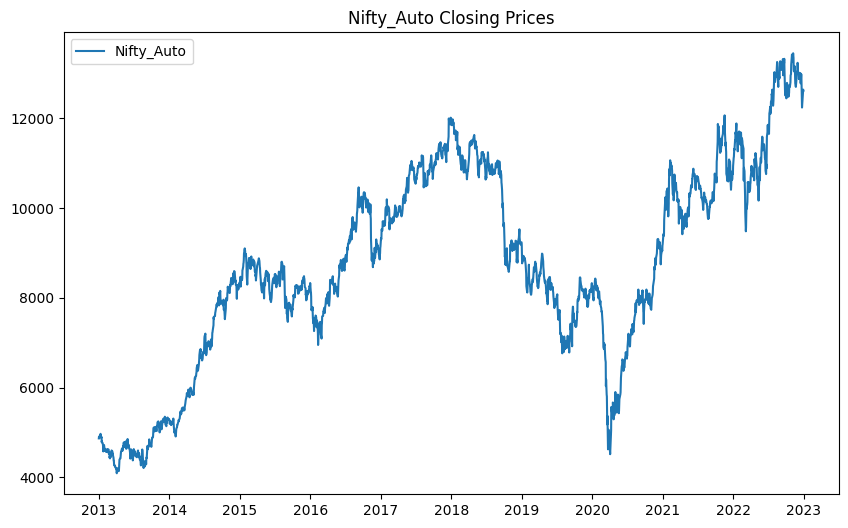

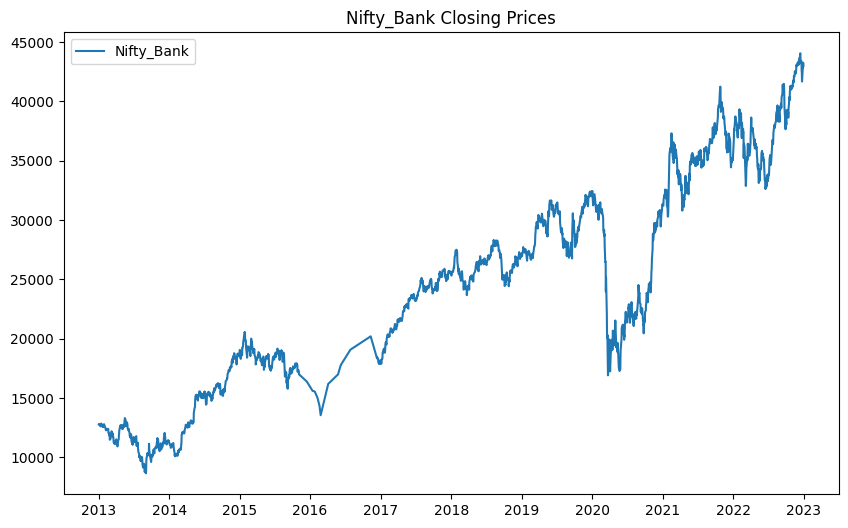

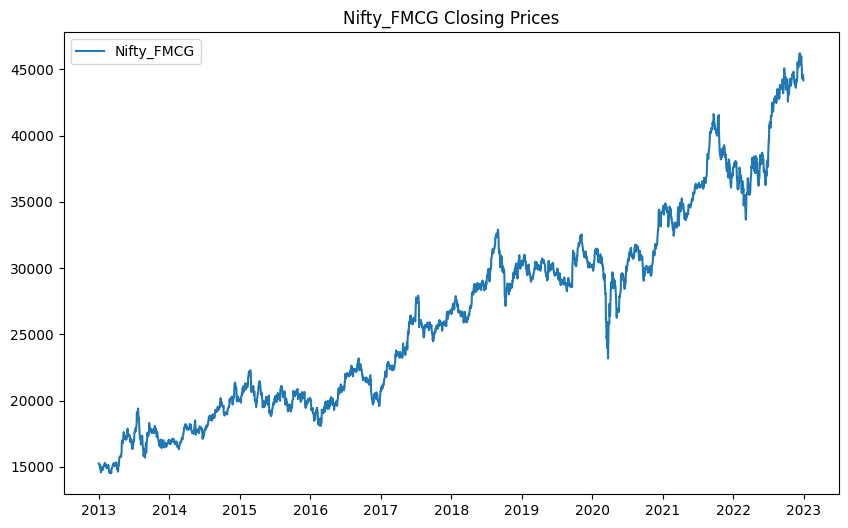

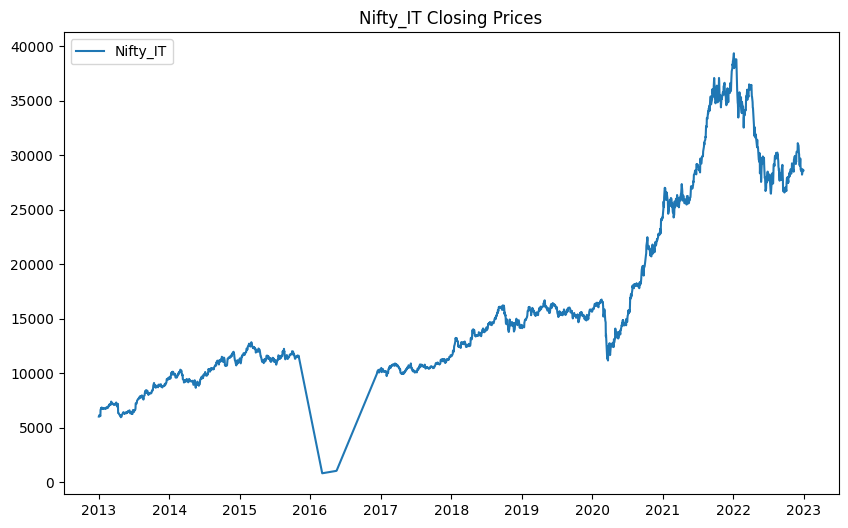

Summary statistics for Nifty_Auto:
               Open          High           Low         Close     Adj Close  \
count   2453.000000   2453.000000   2453.000000   2453.000000   2453.000000   
mean    8762.636938   8824.328435   8683.830862   8751.921474   8751.921474   
std     2238.713519   2245.288421   2222.779194   2232.310298   2232.310298   
min     4089.100098   4131.450195   4076.699951   4092.899902   4092.899902   
25%     7598.100098   7648.850098   7510.100098   7589.000000   7589.000000   
50%     8654.099609   8706.799805   8577.750000   8654.299805   8654.299805   
75%    10649.799805  10727.799805  10555.700195  10637.700195  10637.700195   
max    13544.750000  13544.900391  13316.450195  13443.900391  13443.900391   

             Volume  
count  2.453000e+03  
mean   9.788591e+05  
std    1.603044e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    3.761000e+05  
75%    6.857000e+05  
max    6.009090e+08  
Summary statistics for Nifty_Bank:
               Open 

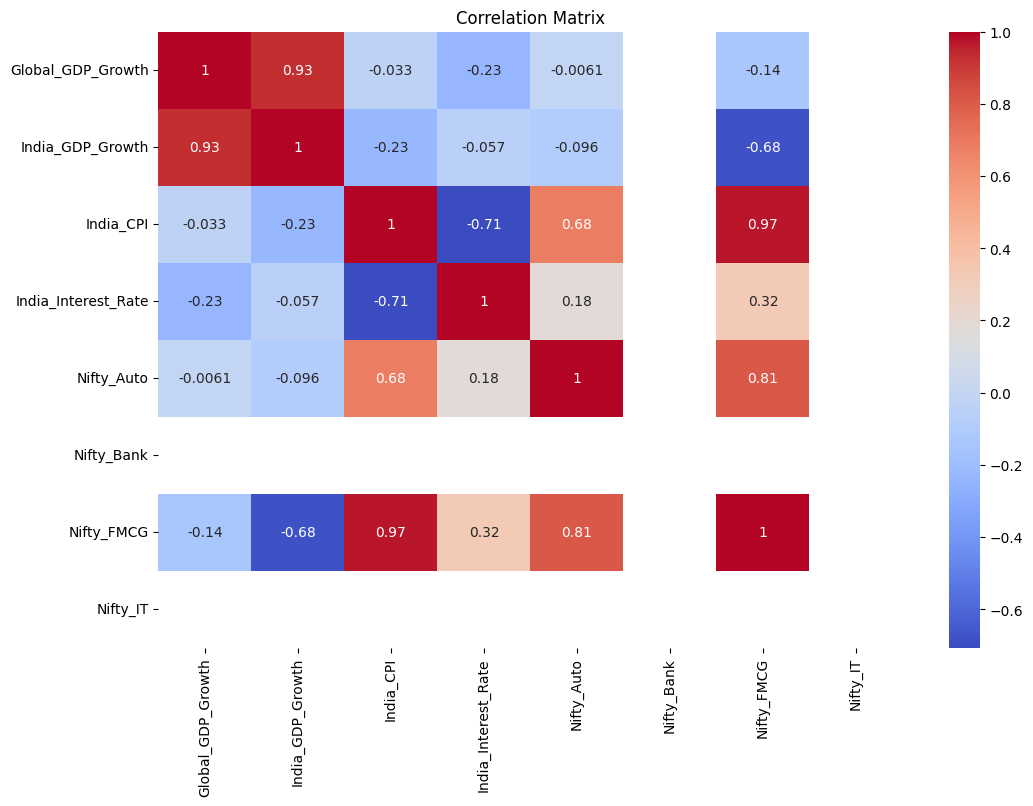

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nifty_indices = ['Nifty_Auto', 'Nifty_Bank', 'Nifty_FMCG', 'Nifty_IT']
nifty_data = {index: pd.read_csv(f'{index}.csv', parse_dates=['Date'], index_col='Date') for index in nifty_indices}

macro_data = pd.read_csv('macroeconomic_data.csv', parse_dates=['Date'], index_col='Date')

for df in nifty_data.values():
    df.ffill(inplace=True)

macro_data.ffill(inplace=True)

for index, df in nifty_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['Close'], label=index)
    plt.title(f'{index} Closing Prices')
    plt.legend()
    plt.show()

for index, df in nifty_data.items():
    print(f'Summary statistics for {index}:')
    print(df.describe())

all_data = macro_data.copy()
for index, df in nifty_data.items():
    all_data[index] = df['Close']

correlation_matrix = all_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

for col in macro_data.columns:
    for lag in range(1, 13):
        macro_data[f'{col}_lag{lag}'] = macro_data[col].shift(lag)


In [7]:
import requests
import pandas as pd

def fetch_world_bank_data(indicator, start_year, end_year, country_code='ALL'):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}?date={start_year}:{end_year}&format=json&per_page=1000"
    response = requests.get(url)
    
    if response.status_code == 200:
        try:
            data = response.json()[1]
            records = {entry['date']: entry['value'] for entry in data if entry['value'] is not None}
            return pd.DataFrame(list(records.items()), columns=['Date', indicator]).sort_values('Date')
        except ValueError as e:
            print(f"JSON decoding error: {e}")
            print(f"Response content: {response.content}")
    else:
        print(f"Failed to fetch data: {response.status_code}")
        print(f"Response content: {response.content}")

unemployment_rate = fetch_world_bank_data('SL.UEM.TOTL.ZS', 2013, 2023, country_code='IN')
trade_balance = fetch_world_bank_data('NE.RSB.GNFS.ZS', 2013, 2023, country_code='IN')

macro_vars = [unemployment_rate, trade_balance]
for df in macro_vars:
    if df is not None:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

macro_data = pd.concat([global_gdp_data, india_gdp_data, india_cpi_data, india_interest_rate_data, unemployment_rate, trade_balance], axis=1)
macro_data.ffill(inplace=True)
macro_data.to_csv('macroeconomic_data.csv')


       Global_GDP_Growth  India_GDP_Growth   India_CPI  India_Interest_Rate  \
count          11.000000         11.000000   11.000000            11.000000   
mean            2.757793          5.897107  168.554840             4.265121   
std             2.167651          4.108752   25.453453             2.796037   
min            -3.057810         -5.831053  131.180410             0.147236   
25%             2.793229          6.419979  150.422257             2.090664   
50%             3.069593          7.239693  165.451069             5.327609   
75%             3.182831          7.703241  187.683774             6.463944   
max             6.228594          9.050278  205.266241             7.556488   

       SL.UEM.TOTL.ZS  NE.RSB.GNFS.ZS  
count       11.000000       11.000000  
mean         7.032091       -2.715708  
std          1.265310        0.984733  
min          4.668000       -3.761312  
25%          6.445000       -3.407453  
50%          7.728000       -2.982409  
75%     

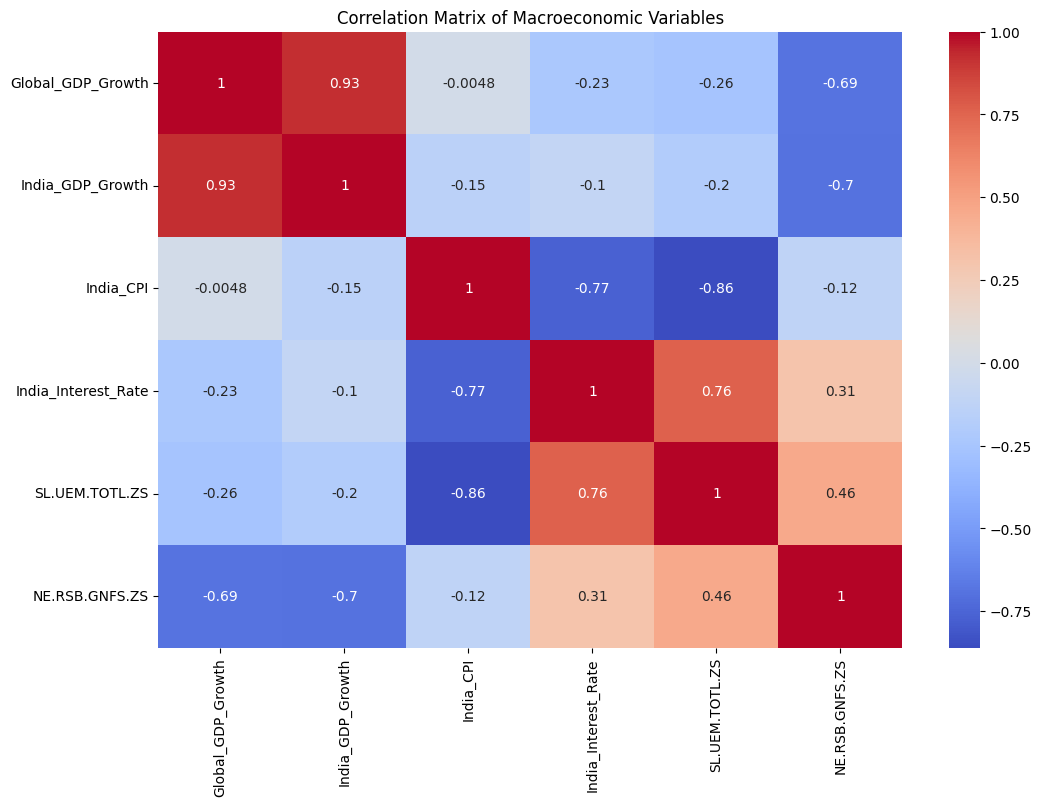

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

macro_data = pd.read_csv('macroeconomic_data.csv', parse_dates=['Date'], index_col='Date')

print(macro_data.describe())

plt.figure(figsize=(12, 8))
sns.heatmap(macro_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Macroeconomic Variables')
plt.show()


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

macro_data = pd.read_csv('macroeconomic_data.csv', parse_dates=['Date'], index_col='Date')

max_lags = 3
for col in macro_data.columns:
    for lag in range(1, max_lags + 1):
        macro_data[f'{col}_lag{lag}'] = macro_data[col].shift(lag)

macro_data.dropna(inplace=True)

scaler = StandardScaler()
macro_data_scaled = scaler.fit_transform(macro_data)

pca = PCA(n_components=0.95)
macro_data_pca = pca.fit_transform(macro_data_scaled)

pca_columns = [f'PC{i+1}' for i in range(macro_data_pca.shape[1])]
macro_data_pca_df = pd.DataFrame(macro_data_pca, index=macro_data.index, columns=pca_columns)

print(macro_data_pca_df.head())

                 PC1       PC2       PC3       PC4       PC5
Date                                                        
2016-01-01 -3.548053 -0.914590 -0.325230 -0.808488  2.091534
2017-01-01 -2.846049  0.512911 -0.306185 -1.294599 -0.085672
2018-01-01 -1.736579  0.665629 -1.177566 -1.484899 -1.364190
2019-01-01 -1.169440 -0.727122 -1.251959 -0.216567 -0.912706
2020-01-01 -1.572635 -1.777178 -0.214830  4.004178 -0.255523
